In [11]:
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace
from SelectionCutOut import fitsImages
from skimage.feature import hessian_matrix, hessian_matrix_eigvals


In [31]:
%matplotlib inline


In [50]:
maps = sunpy.map.Map('SubImages', sequence=True)

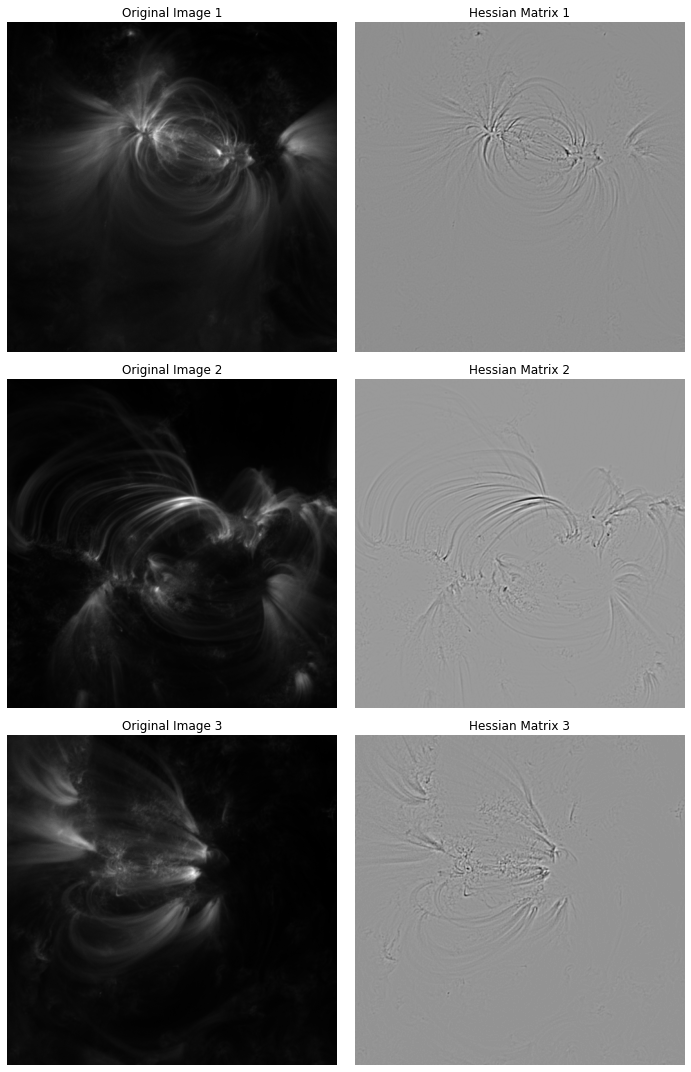

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(10, 5 * 3))

# Iterate over each submap
for i, submap in enumerate(maps):
    # Plot original image
    axs[i, 0].imshow(submap.data, cmap='gray')
    axs[i, 0].set_title('Original Image {}'.format(i + 1))
    axs[i, 0].axis('off')

    # Calculate Hessian matrix (Laplacian of Gaussian)
    hessian_matrix = gaussian_laplace(submap.data, sigma=1)

    # Plot Hessian matrix
    axs[i, 1].imshow(hessian_matrix, cmap='gray')
    axs[i, 1].set_title('Hessian Matrix {}'.format(i + 1))
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/2272169007.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(num_rows, num_columns, col + 1, projection=submap)
/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/2272169007.py:20: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = calculate_hessian_matrix(submap.data, sigma=1, order='rc')


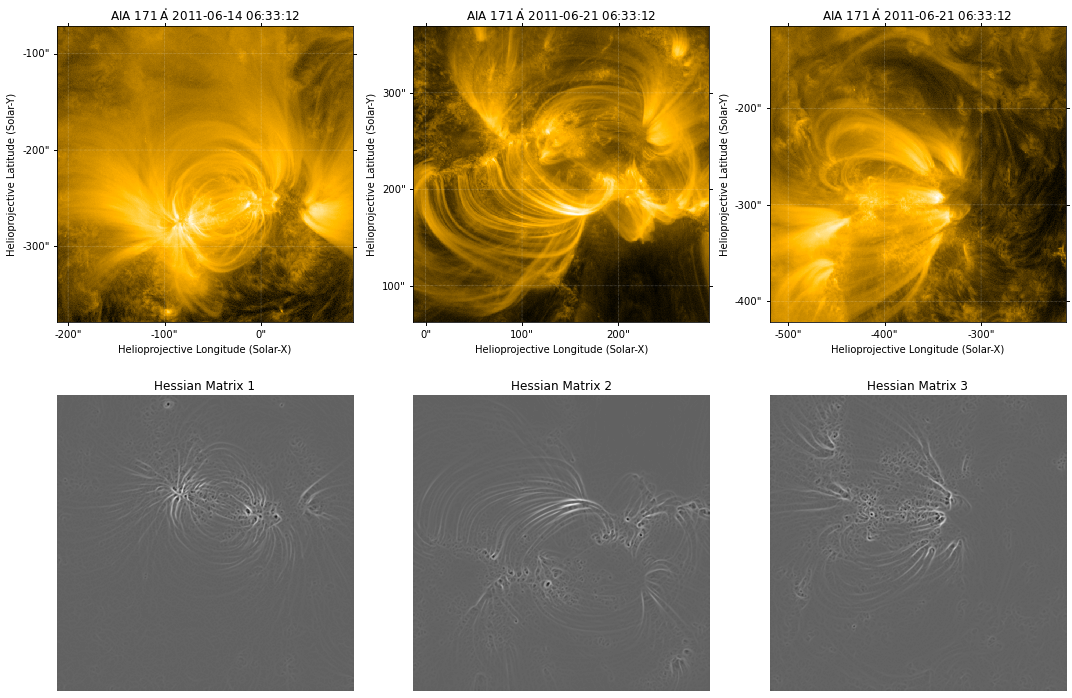

In [69]:
from skimage.feature import hessian_matrix as calculate_hessian_matrix, hessian_matrix_eigvals

# Create subplots
num_images = len(maps)
num_columns = 3
num_rows = 2

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Iterate over each submap
for i, submap in enumerate(maps):
    row = i // num_columns
    col = i % num_columns

    # Plot original image using SunPy's plotting functionality
    ax = plt.subplot(num_rows, num_columns, col + 1, projection=submap)
    submap.plot()

    # Calculate Hessian matrix
    H_elems = calculate_hessian_matrix(submap.data, sigma=1, order='rc')
    eigenvalues = hessian_matrix_eigvals(H_elems)
    hessian_matrix_img = np.max(eigenvalues, axis=0)

    # Enhance contrast of Hessian matrix
    #hessian_matrix_img = np.square(hessian_matrix_img)

    # Plot Hessian matrix
    ax = plt.subplot(num_rows, num_columns, num_columns + col + 1)
    im = ax.imshow(hessian_matrix_img, cmap='gray')
    ax.set_title('Hessian Matrix {}'.format(i + 1))

    # Hide axis
    ax.axis('off')


plt.tight_layout()
plt.show()


/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/2080392938.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(num_rows, num_columns, col + 1, projection=submap)
/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/2080392938.py:24: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = calculate_hessian_matrix(submap.data, sigma=1, order='rc')
/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/2080392938.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(num_rows, num_columns, num_columns + col + 1, projection=dot

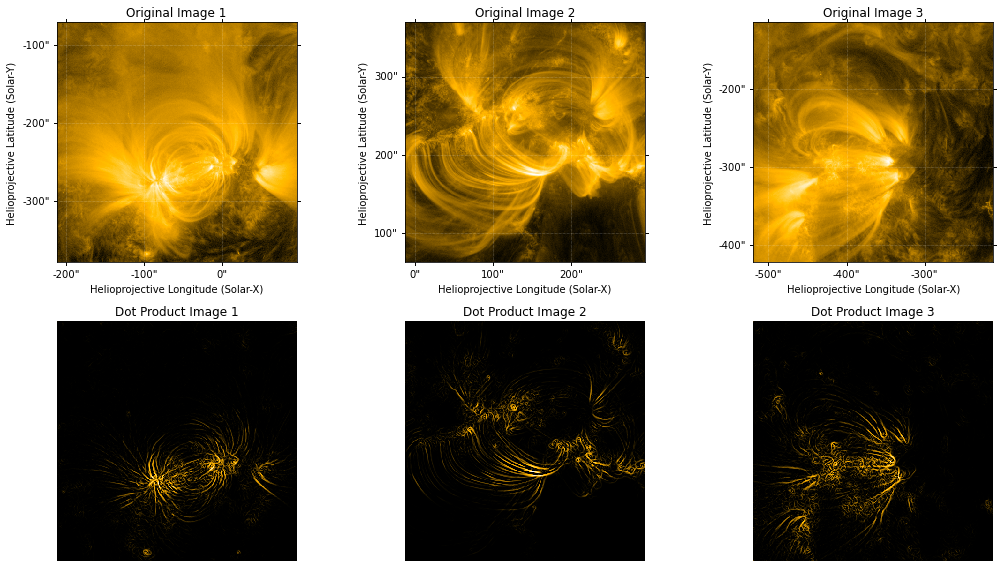

In [87]:
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix as calculate_hessian_matrix, hessian_matrix_eigvals

# Create subplots
num_images = len(maps)
num_columns = 3
num_rows = 2

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 8))

# Iterate over each submap
for i, submap in enumerate(maps):
    row = i // num_columns
    col = i % num_columns

    # Plot original image using SunPy's plotting functionality
    ax = plt.subplot(num_rows, num_columns, col + 1, projection=submap)
    submap.plot()
    ax.set_title('Original Image {}'.format(i + 1))

    # Calculate Hessian matrix
    H_elems = calculate_hessian_matrix(submap.data, sigma=1, order='rc')
    eigenvalues = hessian_matrix_eigvals(H_elems)
    hessian_matrix_img = np.max(eigenvalues, axis=0)

    # Enhance contrast of Hessian matrix
    hessian_matrix_img = np.square(hessian_matrix_img)

    
    # Create a new SunPy map from the dot-producted image
    dot_product_map = sunpy.map.Map(hessian_matrix_img , submap.meta)

    # Plot dot-producted image using SunPy's plotting functionality
    ax = plt.subplot(num_rows, num_columns, num_columns + col + 1, projection=dot_product_map)
    dot_product_map.plot()
    ax.set_title('Dot Product Image {}'.format(i + 1))
    # Hide axis
    ax.axis('off')
  

plt.tight_layout()
plt.show()


# Wavelet Denoising

/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/43412110.py:26: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = calculate_hessian_matrix(denoised_image, sigma=1, order='rc')
/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/43412110.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(num_rows, num_columns, col + 1, projection=original_map)
/var/folders/rr/b6q44j0539g90sc9nb9rph940000gn/T/ipykernel_70251/43412110.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(num_rows, num_columns, num_columns + col + 1, projection=

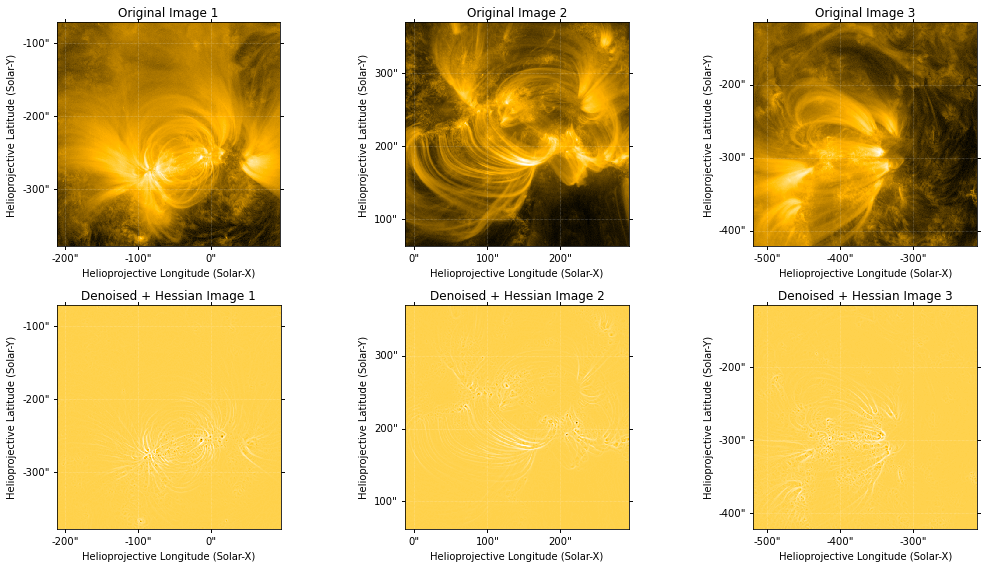

In [96]:
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet
from skimage.feature import hessian_matrix as calculate_hessian_matrix, hessian_matrix_eigvals

# Create subplots
num_images = len(maps)
num_columns = 3
num_rows = 2

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 8))

# Iterate over each submap
for i, submap in enumerate(maps):
    row = i // num_columns
    col = i % num_columns

    # Original image
    original_image = submap.data
    
    # Denoise the image using wavelet denoising
    denoised_image = denoise_wavelet(original_image)

    # Calculate Hessian matrix
    H_elems = calculate_hessian_matrix(denoised_image, sigma=1, order='rc')
    eigenvalues = hessian_matrix_eigvals(H_elems)
    hessian_matrix_img = np.max(eigenvalues, axis=0)

    # Create SunPy maps from original and denoised images
    original_map = sunpy.map.Map(original_image, submap.meta)
    denoised_map = sunpy.map.Map(hessian_matrix_img, submap.meta)

    # Plot original image
    ax = plt.subplot(num_rows, num_columns, col + 1, projection=original_map)
    original_map.plot()
    ax.set_title('Original Image {}'.format(i + 1))
    
    # Plot obtained image after wavelet denoising and Hessian
    ax = plt.subplot(num_rows, num_columns, num_columns + col + 1, projection=denoised_map)
    denoised_map.plot()
    ax.set_title('Denoised + Hessian Image {}'.format(i + 1))

plt.tight_layout()
plt.show()


In [99]:
from scipy.ndimage import median_filter, gaussian_filter

submap_data = maps[0].data

# Define the window size for the adaptive filter
window_size = 3  # Adjust as needed

# Adaptive median filtering
def adaptive_median_filter(image, window_size):
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = image[max(0, i - window_size):min(image.shape[0], i + window_size + 1),
                           max(0, j - window_size):min(image.shape[1], j + window_size + 1)]
            filtered_image[i, j] = np.median(window)
    return filtered_image

adaptive_median_filtered = adaptive_median_filter(submap_data, window_size)

# Adaptive Gaussian filtering
def adaptive_gaussian_filter(image, window_size):
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = image[max(0, i - window_size):min(image.shape[0], i + window_size + 1),
                           max(0, j - window_size):min(image.shape[1], j + window_size + 1)]
            sigma = np.std(window)
            filtered_image[i, j] = gaussian_filter(image[i, j], sigma)
    return filtered_image

adaptive_gaussian_filtered = adaptive_gaussian_filter(submap_data, window_size)

# Display or save the filtered images as needed

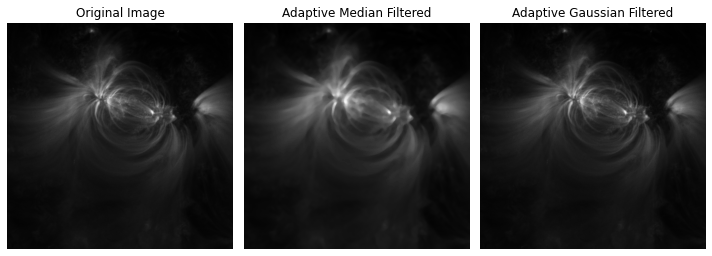

In [100]:
import matplotlib.pyplot as plt

# Plotting both results side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(submap_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Adaptive median filtered image
plt.subplot(1, 3, 2)
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title('Adaptive Median Filtered')
plt.axis('off')

# Adaptive Gaussian filtered image
plt.subplot(1, 3, 3)
plt.imshow(adaptive_gaussian_filtered, cmap='gray')
plt.title('Adaptive Gaussian Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()
